In [44]:
using DataFrames, CSV, DelimitedFiles, Plots, FFTW
include("/home/kirk/Documents/research/CHANDRATest/DJM.jl")

Main.DJM

In [38]:
function genFreqSums(powMatrix)
    sums=zeros(length(powMatrix[1,1,2:end]))
    for i in 1:length(powMatrix[1,1,2:end])
        sums[i]+=sum(powMatrix[:,:,i+1]) #i+1 becaus normal matrix is in 1st slice
    end
    return sums
end
function sumsLog(sums)
    sums4log=zeros(length(sums))
    for i in 1:length(sums4log)
        if sums[i]==0
            sums4log[i]=1
        else
            sums4log[i]=sums[i]
        end
    end
    return sums4log
end
function genFRange(df,powList)
    fbins=ceil(maximum(powList.freq[:])/df)
    frange=zeros(Int(fbins))
    for i in 1:length(frange)
        frange[i]=i*df
    end
    return frange
end

genFRange (generic function with 1 method)

In [39]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8MatrixOVERLAP,pows8src=DJM.createPowMatrix(pows8,1)
sums8OVERLAP=genFreqSums(pows8MatrixOVERLAP)
sums8LogOVERLAP=sumsLog(sums8OVERLAP)

1255743 potential matches had the same obsid and were excluded.


1546-element Array{Float64,1}:
 8.0
 7.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 3.0
 2.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [45]:
pows8Matrix=DJM.createPowMatrix(pows8,0)

1255743 potential matches had the same obsid and were excluded.


101×101×1547 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     10389.0  10772.0  10772.0  792931.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      3904.0   4022.0   4022.0  296909.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   1569.0   1620.0   1620.0  119237.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       660.0    688.0    688.0   50555.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       386.0    400.0  

In [46]:
sums8=genFreqSums(pows8Matrix)
sums8Log=sumsLog(sums8)

1546-element Array{Float64,1}:
 2268.0
  790.0
  187.0
  287.0
  630.0
 1030.0
  134.0
  466.0
  214.0
  222.0
  133.0
   55.0
  201.0
    ⋮  
    1.0
    1.0
    1.0
    2.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0

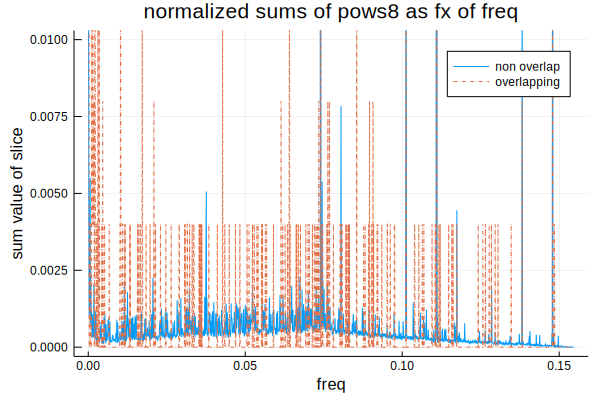

In [47]:
fRange8=genFRange(0.0001,pows8)
plot(fRange8,sums8./sum(sums8),title="normalized sums of pows8 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="non overlap")
plot!(fRange8,sums8OVERLAP./sum(sums8OVERLAP),label="overlapping",linestyle=:dashdot,ylims=[0,0.01])

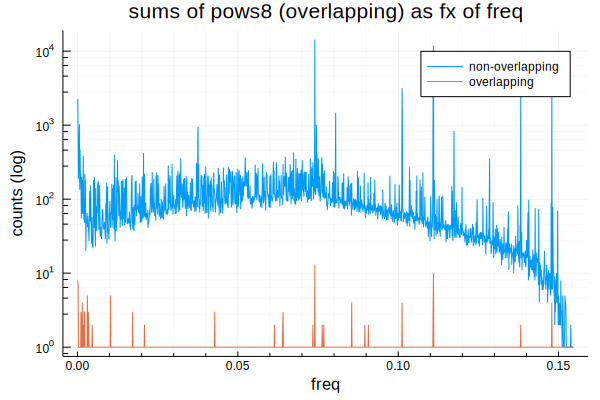

In [48]:
plot(fRange8,sums8Log,yaxis=:log,title="sums of pows8 (overlapping) as fx of freq",xlabel="freq",ylabel="counts (log)",label="non-overlapping",minorticks=true,minorgrid=true)
plot!(fRange8,sums8LogOVERLAP,label="overlapping")

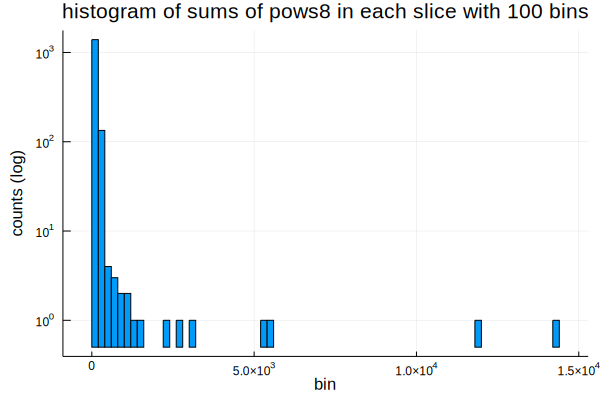

In [49]:
histogram(sums8,bins=100,yaxis=:log,title="histogram of sums of pows8 in each slice with 100 bins",xlabel="bin",ylabel="counts (log)",label="")

In [50]:
pows12=CSV.read("cxc.fftinfo.all12")
pows12MatrixOVERLAP,pows12src=DJM.createPowMatrix(pows12,1)
sums12OVERLAP=genFreqSums(pows12MatrixOVERLAP)
sums12LogOVERLAP=sumsLog(sums12OVERLAP)

216981 potential matches had the same obsid and were excluded.


1544-element Array{Float64,1}:
 7.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 2.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [51]:
pows12Matrix=DJM.createPowMatrix(pows12,0)
sums12=genFreqSums(pows12Matrix)
sums12Log=sumsLog(sums12)

216981 potential matches had the same obsid and were excluded.


1544-element Array{Float64,1}:
 1077.0
   96.0
   12.0
    9.0
  243.0
  264.0
   10.0
  211.0
   78.0
   27.0
   29.0
   22.0
   31.0
    ⋮  
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0

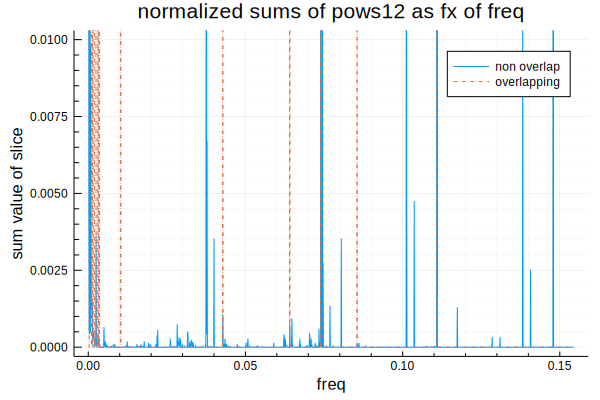

In [53]:
fRange12=genFRange(0.0001,pows12)
plot(fRange12,sums12./sum(sums12),title="normalized sums of pows12 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="non overlap")
plot!(fRange12,sums12OVERLAP./sum(sums12OVERLAP),label="overlapping",linestyle=:dashdot,ylims=[0,0.01])
plot!(minorticks=true,minorgrid=true)
#plot!([0.107],seriestype=:vline,label="test freq")

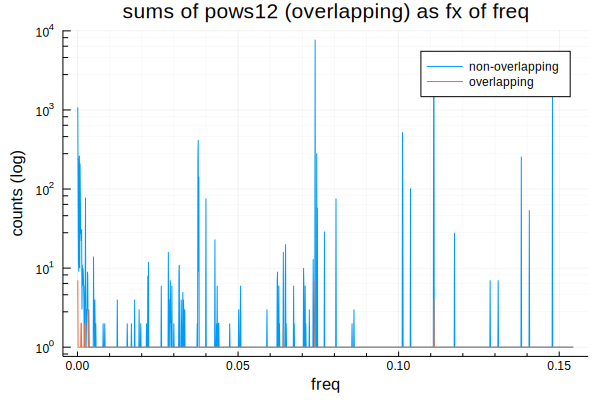

In [54]:
plot(fRange12,sums12Log,yaxis=:log,title="sums of pows12 (overlapping) as fx of freq",xlabel="freq",ylabel="counts (log)",label="non-overlapping",minorticks=true,minorgrid=true)
plot!(fRange12,sums12LogOVERLAP,label="overlapping")

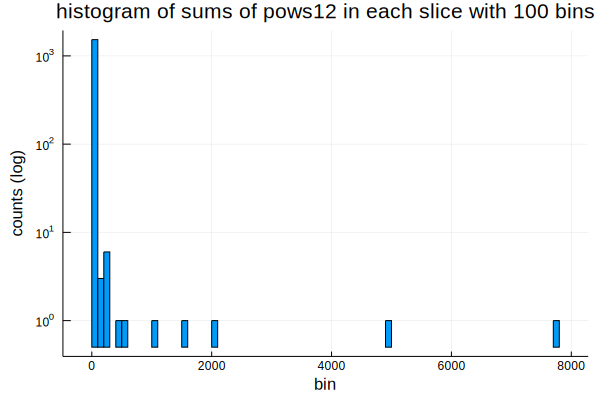

In [55]:
histogram(sums12,bins=100,yaxis=:log,title="histogram of sums of pows12 in each slice with 100 bins",xlabel="bin",ylabel="counts (log)",label="")

In [19]:
pows12src

72778-element Array{Any,1}:
 Tuple{Int64,Int64}[(3, 4)]      
 Tuple{Int64,Int64}[(8, 9)]      
 Tuple{Int64,Int64}[(10, 11)]    
 Tuple{Int64,Int64}[(10, 20)]    
 Tuple{Int64,Int64}[(10, 60)]    
 Tuple{Int64,Int64}[(11, 20)]    
 Tuple{Int64,Int64}[(11, 60)]    
 Tuple{Int64,Int64}[(14, 15)]    
 Tuple{Int64,Int64}[(16, 28)]    
 Tuple{Int64,Int64}[(16, 69)]    
 Tuple{Int64,Int64}[(16, 71)]    
 Tuple{Int64,Int64}[(20, 37)]    
 Tuple{Int64,Int64}[(22, 23)]    
 ⋮                               
 Tuple{Int64,Int64}[(1834, 1839)]
 Tuple{Int64,Int64}[(1834, 1840)]
 Tuple{Int64,Int64}[(1834, 1841)]
 Tuple{Int64,Int64}[(1835, 1836)]
 Tuple{Int64,Int64}[(1835, 1842)]
 Tuple{Int64,Int64}[(1836, 1842)]
 Tuple{Int64,Int64}[(1839, 1840)]
 Tuple{Int64,Int64}[(1839, 1841)]
 Tuple{Int64,Int64}[(1840, 1841)]
 Tuple{Int64,Int64}[(1850, 1851)]
 Tuple{Int64,Int64}[(1853, 1854)]
 Tuple{Int64,Int64}[(1856, 1857)]

In [20]:
pows12.dec[3:4]

2-element Array{Float64,1}:
 -73.40352511280733
 -73.40352511280733

In [21]:
pows12.ra[3:4]

2-element Array{Float64,1}:
 18.95472267715627
 18.95472267715627

In [22]:
pows12.power[3:4]

2-element Array{Float64,1}:
 31.30296801294995 
 12.151857527493563

In [23]:
pows12.freq[3:4]

2-element Array{Float64,1}:
 0.001108727185752377
 0.001267116783717002

In [24]:
pows12

,obsid,srcnum,startdate,exptime,ra,dec,freq,power
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1026,26,51833.8,6458.48,19.9382,-73.4501,0.00123975,13.2664
2,1028,105,51856.5,6324.74,19.038,-73.414,0.000316292,13.824
3,1028,113,51856.5,6324.74,18.9547,-73.4035,0.00110873,31.303
4,1028,113,51856.5,6324.74,18.9547,-73.4035,0.00126712,12.1519
5,1028,38,51856.5,6324.74,19.8812,-73.5169,0.00110816,21.5887
6,1028,88,51856.5,6324.74,19.1853,-73.4323,0.000316454,12.6433
7,1029,13,52024.6,6120.26,19.6143,-73.4658,0.00115807,56.0898
8,1030,14,52025.6,6152.72,19.6181,-73.4675,0.00114639,74.6027
9,1030,14,52025.6,6152.72,19.6181,-73.4675,0.00212901,18.2923


In [25]:
MCList=CSV.read("MCTestList.csv")

,name,ra,dec,porb,fx_limit,fx,fx_max,pulse_period
,String,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰
1,XTE SMC144s,missing,missing,61.2,missing,missing,missing,144.1
2,1H0103-762,17.3125,-74.7444,missing,missing,2.3,missing,missing
3,RX J0209.6-7427,32.405,-74.4533,missing,missing,10.6,missing,missing
4,RX J0032.9-7348,8.23375,-73.8053,missing,missing,0.2,missing,missing
5,AX J0042.0-7344,10.52,-73.7494,missing,missing,0.023,missing,missing
6,AX J0051.7-7341,12.9835,-73.6976,missing,missing,0.005,missing,missing
7,H 0053-739,13.6508,-73.6764,missing,<,1.0,50.0,2.37
8,AX J0101.4-7335,15.3658,-73.5833,missing,missing,0.02,missing,missing
9,RX J0050.7-7332,12.6954,-73.5467,missing,missing,0.003,missing,missing
